# Assignment 6

## Importing Libraries

In [1]:
!pip install seaborn
!pip install scipy
!pip install sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print('Our data set contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Our data set contains 150 rows and 5 columns


In [5]:
df.isnull().sum().sort_values(ascending=False)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[Text(0.5, 1.0, 'Sepal length')]

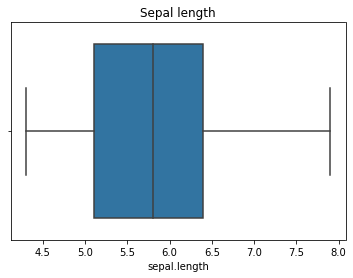

In [8]:
sns.boxplot(x=df['sepal.length']).set(title='Sepal length')

[Text(0.5, 1.0, 'Sepal width')]

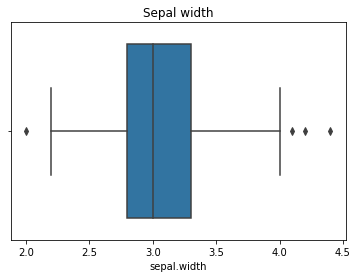

In [9]:
sns.boxplot(x=df['sepal.width']).set(title='Sepal width')

[Text(0.5, 1.0, 'Petal length')]

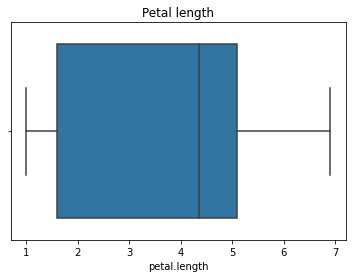

In [10]:
sns.boxplot(x=df['petal.length']).set(title='Petal length')

In [11]:
Q1=df['sepal.width'].quantile(0.25)
Q3=df['sepal.width'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker=Q1-1.5*IQR
Upper_Whisker=Q3+1.5*IQR
df=df[df['sepal.width']>Lower_Whisker]
df=df[df['sepal.width']<Upper_Whisker]

In [12]:
X = df.iloc[:,:4].values
y = df['variety'].values

## Splitting data into training and testing data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state = 4)

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Naive Bayes classifier Model

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(X_test) 


## Accuracy

In [17]:
acc=classifier.score(X_test,y_test)
acc

0.9772727272727273

## Confusion Matrix


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# tp=confusion_matrix[0][0]
# fp=confusion_matrix[0][1]
# fn=confusion_matrix[1][0]
# tn=confusion_matrix[1][1]

tps=confusion_matrix[0][0]
fns=confusion_matrix[1][0]+confusion_matrix[2][0]
fps=confusion_matrix[0][1]+confusion_matrix[0][2]
tns=confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2]

tpve=confusion_matrix[1][1]
fnve=confusion_matrix[0][0]+ confusion_matrix[2][0]
fpve=confusion_matrix[1][1]+ confusion_matrix[1][2]
tnve=confusion_matrix[0][1]+confusion_matrix[0][2]+confusion_matrix[2][1]+confusion_matrix[2][2]

tpvi=confusion_matrix[2][2]
fnvi=confusion_matrix[0][0]+confusion_matrix[0][1]
fpvi=confusion_matrix[2][1]+confusion_matrix[2][2]
tnvi=confusion_matrix[0][1]+confusion_matrix[0][2]+confusion_matrix[1][1]+confusion_matrix[1][2]

ttp=tps+tpve+tpvi
tfp=fps+fpve+fpvi
ttn=tns+tnve+tnvi
tfn=fns+fnve+fnvi


print(classification_report(y_test, y_pred))

confusion_matrix

# print("TP: ",tp)
# print("FP: ",fp)
# print("FN: ",fn)
# print("TN: ",tn)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
  Versicolor       0.92      1.00      0.96        11
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.98        44
   macro avg       0.97      0.97      0.97        44
weighted avg       0.98      0.98      0.98        44



array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 12]])

## Computing Accuracy,error rate,precision,recall

In [21]:
print('Accuracy: {:.3f}'.format(acc))
errorRate=1-acc
print('Error Rate:{:.3f}'.format(errorRate))
precision = ttp/(ttp+tfp)
print('Precision: {:.3f}'.format(precision))
recall=ttp/(ttp+tfn)
print('Recall:{:.3f}  '.format(recall))

Accuracy: 0.977
Error Rate:0.023
Precision: 0.642
Recall:0.518  
